## Measuring Execution Time <a class="anchor" id="measuring"></a>

   > [1. CPU time or wall time ?](#1) <br>
   > [2. Is it enough to measure the execution time just one time?](#2)<br>
   > [3. How to measure the execution time from within Jupyter Notebook?](#3)<br>
   > [4. Should you measure the execution time of the full program run, or just a part of it?](#4)<br>

### 1. CPU time or wall time ? <a class="anchor" id="1"></a>

There are many methods to measure execution time. In Jupyter Notebooks we can use the magic command `%%time` to measure the execution time of a code cell. Let's look at this example (the code is in python):

In [1]:
%%time
a = 2
while a<100:
    a *= 5

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.25 µs


As a result we get CPU time and Wall time. Do you know the difference? 

`CPU time` measures the total time during which the CPU was busy executing our code, including time spent in library fu`CPU time` measures the total time during which the CPU was busy executing our code, including time spent in library functions. The `wall time` on the other hand also measures the time, during which our program was idle. Wall time measures 'the time that has elapsed between the start and finish of execution of the code' [[1]](#a).
nctions. The `wall time` on the other hand also measures the time, during which our program was idle. Wall time measures 'the time that has elapsed between the start and finish of execution of the code' [[1]](#a).

**Question:** Which one do you think you need to measure, if you want to evaluate the performance of your parallel program?

In [ ]:
%run ../topsecret/test3.ipynb

Write 'CPU Time' or 'Wall Time':


**Example** [[1]](../Performance.ipynb#a): Imagine you have a distributed-memory program and a process calls a receive function. Now the process may have to wait for the sending process to execute the matching send, which is why the operation system puts that process to sleep. This idle time is not counted as CPU time, because no function that has been called by the process is active. However, we should have this idle time in our counting for the overall run-time, since it could be a real cost in our program. "If each time the program is run, the process has to wait, ignoring the time it spends waiting would give a misleading picture of the actual run-time of the program" [[1]](../Performance.ipynb#a). 

### 2. How many times do you have to run the code?<a class="anchor" id="2"></a>

**Challenge:** Run the code cell above (the one starting with %%time) multiple times. What do you observe ?

You probably noticed that the wall time and CPU time differ each time you run the code. Since many other things are happening on the system while the code is executed, the exact values for CPU and wall time will differ each time we run the code. 

The following code will give you a graphical illustration of this effect. Note, that in the code below we measure the wall time without the help of the `%%time` magic command. This allow us to save the result of one single measurement multiple times, which we can then plot into a histogram. 

**Hint:** You can replace my code within the commented section with your own code if you want to graphically display the variance in wall time measurements. Should your code not be in Python, then you can make an executable of it instead, place the file in the same folder you have this notebook at, and replace my code with `! ./nameOfYourBinary`. The `!` sign is a special character used in jupyter notebooks if you want to execute a terminal command.

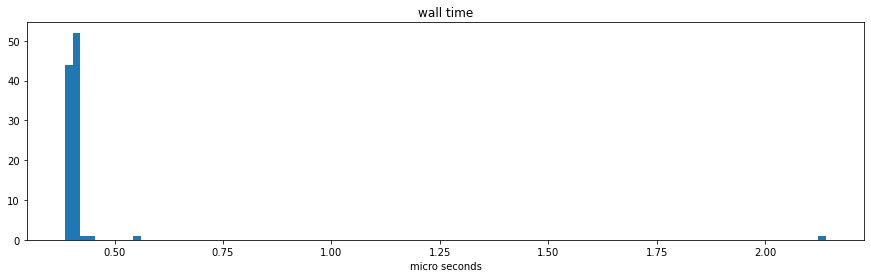

In [4]:
import timeit
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

seconds = 1
miliSeconds = 1e3
microSeconds = 1e6
nanoSeconds = 1e9

#start of constants you might want to adjust
timeUnit = microSeconds #determines the time Unit on the x axis of the histogramm
label = 'micro seconds' #this should be the same as the chosen timeUnit 
iterations = 100 #amount of measurements
#end of constants you might want to adjust

times = np.zeros(iterations)
binsInHistogramm = iterations #amount of containers in the Histogramm
 

for x in range(iterations):
    time1 = timeit.default_timer()

#start of the code you want to measure execution time on
    a = 2
    while a<100:
        a *= 5
#end of the code you want to measure execution time on

    time2 = timeit.default_timer()
    times[x]=(time2-time1)*timeUnit

#display histogramm
fig,ax = plt.subplots(figsize=(15,4))
ax.hist(times, bins=binsInHistogramm)
ax.set_title('wall time')
ax.set_xlabel(label);

**Challenge:** Run the code above multiple times. What do you observe?

Each time you rerun the code, the histogram will look different. However, probably you notice one single value at the very right, each time you run the code. This makes it difficult to interpret the histogram values. 

Do you think this is just random? Or could there be a good reason for this behavior?

To answer this question, let's look at the first 20 values of our measurements:

In [5]:
if np.size(times)>=20:
    print(times[:20])
else: print(times)

[2.14017928 0.55320561 0.44703484 0.42282045 0.41536987 0.41164458
 0.41350722 0.41723251 0.41723251 0.41909516 0.41350722 0.41536987
 0.41350722 0.40791929 0.41536987 0.41536987 0.41536987 0.41164458
 0.41536987 0.41536987]


Probably the first value is much higher than the following ones. This makes sense, because the first time we run the code data has to be first loaded into the cache. 

Let's discard the first measurement and look at our histogram again:

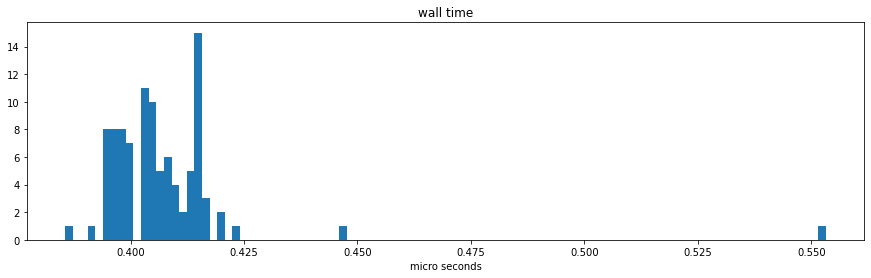

In [6]:
#display histogramm without the first value
fig,ax = plt.subplots(figsize=(15,4))
ax.hist(times[1:], bins=binsInHistogramm)
ax.set_title('wall time')
ax.set_xlabel(label);

This histogram looks much better for analysis. 

**Question**: Let's say you want to give one single value for the speed of your program/code section. Which value would you choose? The smallest? The biggest? An average? Would you include very large/small values when calculating the average? 

In [ ]:
%run ../topsecret/test4.ipynb

What about the number of iterations? How many times should you measure the wall time on your code, to avoid random noise?

In [ ]:
%run ../topsecret/test5.ipynb

<br>Let's try a few `number of iterations` and plot the results. For iteration number x we measure the wall time x times, and save the smallest measurement. Be patient, it might take a few seconds for the time measurements to finish.

**Hint:** You could replace my code within the commented section with your own code.

In [13]:
iterations = [10,100,1000,10000,100000,1000000,10000000]
results = []

for i in iterations:
    result = np.zeros(i)
    for x in range(i):
        time1 = timeit.default_timer()

    #start of the code you want to measure execution time on'''
        a = 2
        while a<100:
            a *= 5
    #end of the code you want to measure execution time on'''

        time2 = timeit.default_timer()
        result[x]=(time2-time1)*1000000 #micro-seconds
    results.append(result.min())

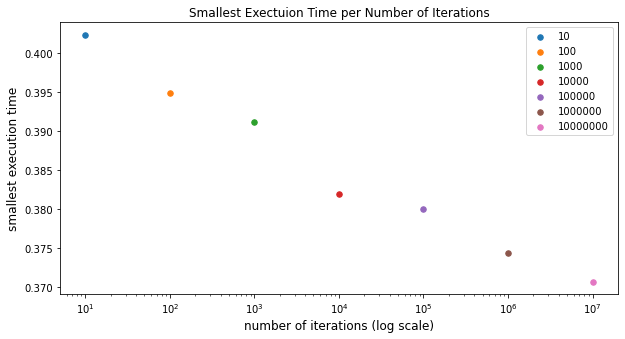

In [14]:
#plot results
fig,ax = plt.subplots(figsize=(10,5)) 
for i in range(len(iterations)):
    ax.scatter(iterations[i], results[i], s=30, label=iterations[i])
ax.set_xlabel('number of iterations (log scale)', fontsize=12)
ax.set_ylabel('smallest execution time', fontsize=12)
ax.set_title('Smallest Exectuion Time per Number of Iterations')
ax.semilogx()
ax.legend()

The more often you run the code, the more likely you will get a measurement during which the system is not very busy doing other things. As we can see in the plot above, whether you run the code 10 times or 10'000 times can make a big difference. At some point though, the benefit you get from further increasing the number of iterations will become insignificant. When exactly that point is reached depends on: 
- the hardware
- the background work happening on the system
- the code 

When I run the code above on my system, it looks like after 1 million iterations there is no significant improvement for the minimal execution time. The python module timeit by default also makes 1 million measurements [[5]](../Performance.ipynb#e) [[6]](../Performance.ipynb#g), so this seems to be a good standard practice. For code that is more time consuming you might have to adjust the number of iterations for practical reasons.

<img src="../figures/trick.jpg" width="600"  alt="I could run the serial program on my old mac, and the parallel one on my new Mac...my teacher will be impressed by the speed-up">

When you want to compare the execution times of different programs (such as a serial and a parallel version) it is obviously necessary that you measure both execution times on the same system, and with similar amount of background work happening on the system. There are multiple ways of how one could influence the measurements and thus distort the calculations of speed-up. If you are interested in this topic, I recommend you read the following article "Misleading Performance Reporting in the Supercomputing Field" by David H. Bailey [[7]](../Performance.ipynb#f).
 

### 3. How to measure execution time ? <a class="anchor" id="3"></a>

You might have noticed, that the wall time that we measured in the beginning with the magic command `%%time` differs from the time we measured manually with the use of the `timeit.default_timer()` function.

There are many different ways of measuring wall time, and each methods will give slightly different results. The explanation for this is `overhead`. We will talk more about overhead later. As long as you are consistent with the method you use for measuring time, it doesn't matter so much which one you choose.

**Timeit Magic Command:** The probably most used method to measure execution time in Jupyter Notebooks is with the built-in magic command `%timeit`. You might want to play around with the following options [[8]](../Performance.ipynb#h):

- -o allows you to save the `TimeitResult` object. This also gives you the chance to access some interesting attributes 
- -q silences the output
- -r sets the number of repeats
- -n sets the number of loops for each repeat

Maybe you feel confused about the difference between repeats and loops (I was). Just think of loops as 'repeats during each repeat'. In each repeat the code is executed n times (n=number set for loops), and the accumulated time measurement value of all loop runs is saved for every repeat. When you call the attribute `all_runs` you get the accumulated loop times for each 'repeat'. If you want to get the smallest non-accumulated time that was measured in all individual runs, you can use the attribute `best`.

**Example:** To give an example, we are going to run a parallelized sorting program written in c, and measure the total execution time with `%timeit`. You can find the code for this program in `./programs/quicksort`. The program is sorting an array of 1000 random numbers with the quicksort algorithm, using 8 threads. We pass the number of threads to be used as the first argument, and the length of the array to be sorted as the second argument. The option `>/dev/null` silences the output of the program in the terminal. 

In [15]:
time = %timeit -o -n 3 -r 9 -q ! ../programs/quicksort/notiming.o 8 1000 >/dev/null

**Question:** How many times did we run the program?

In [ ]:
%run ../topsecret/test6.ipynb

**Question:** Out of all these program runs, what is the value of the fastest run we measured? What code do you have to run to find out?

In [ ]:
%run ../topsecret/test7.ipynb

### 4. Do we want to measure the execution time of the entire program ? <a class="anchor" id="4"></a>

In the method we used so far to measure the execution time of a program, we measured the time of the entire program run. Time consuming tasks that we might not necessarily want to include in our measurements are:
- loading the program
- loading runtime libraries
- initializing data
- allocating memory
- testing if the calculated solution is correct
- output of the result
- ect.

Be aware, that measuring execution time on the entire program is not standard practice [[1]](../Performance.ipynb#a)! 

So how is it usually done? Well...different programmers do different things. Some will start measuring execution time right before the parallel region is entered and stop immediately after the parallel region is left. Others will start timing when a function containing the main algorithm (i.e.quicksort algorithm) is entered, and stop timing upon return from this function. In both of these two scenarios data is usually initialized and memory allocated before the timing phase begins, and any output or error testing will happen after the timing phase has stopped. 

In the folder `./programs` you can find various programs which can be used to evaluate speed-up, efficiency, scalability. Each algorithm that you can find there has two different implementation versions. 

1. The parallel algorithm without any program internal time measuring 
2. The same parallel algorithm, but measuring the execution only on the parallel algorithm itself

With the second option we don't measure the time for loading the program and runtime libraries, as well as the initialization of data, output of the program, validation of the solution, etc. All the binaries of the first option are called `notiming.o`, whereas the binaries of the second option are called `timing.o`.

Passed arguments for the `notiming.o` programs are: 1.Number of threads that should be used in the parallel regions, 2.Arguments for the algorithm (e.g list length for sorting algorithms). Passed arguments for the `timing.o` programs are: 1. Number of threads, 2. Number of Repeats, 3. Arguments for the algorithm. The `timing.o` versions will save the smallest measured execution time in a text file called `time.txt`. The programs also work without passing any arguments, since there are default values set for all of them. 

Let's do a quick comparison of the execution times we get depending on which program version we use. Here we have to make sure that we use the same amount of repeats for each version. For the `notiming.o` version we set the number of repeats by setting the %timeit parameter `r` to the number of repeats we want. The `timing.o` programs take the number of repeats as the second argument when running it in the terminal.

The graphics below display the difference of time measurement and speed up for the calculation of the Mandelbrot set. You can find the code for the graphics in the notebook ['compare_timemeasuring_methods'](./compare_timemeasuring_methods.ipynb#compare). In that extra notebook you can very easily create analog graphics for any algorithm in the `./programs` section, even for your own programs if you add them (see `./readme.txt` file for details). 

<img src='../figures/compare1.PNG' width='900' art='"compare execution times of two different measuring methods."'>

For both time measuring options we see a similar trend: the more threads we have, the faster runs the program/algorithm. Further, the benefit from further increasing the number of threads seems to get smaller as the thread number increases. We will talk more about his in the section about Amdahl's law.

If we don't pay much attention to the numbers on the y-axis we might think that we get more or less the same results. Be careful here, a more detailed analysis can change this first impression. 

Let's directly compare the absolute execution times:

<img src='../figures/compare2.PNG' width='450' art='"compare execution times of two different measuring methods."'>

It looks like the overhead we get from running the full program instead of only the algorithm is roughly the same for all thread numbers, with a slight increase as the thread number gets bigger. 

Since we are interested in speed-up and how different factors like thread number and problem size (more about this later) influence speed-up, we should also look at the speed-up calculations:

<img src='../figures/compare3.PNG' width='900' art='"compare execution times of two different measuring methods."'>

Well that is very interesting! On the two graphics further above we got the impression that we get more or less the same picture, regardless of which time measuring method we use. When we calculate the speed up, however, we can see 2 things:
1. The speed-ups we get, if we only measure the execution time on the algorithm, are much higher.
2. The two curves have a different shape. On the left graph we can observe, that with the increased number of threads, the additional speed up gets smaller and smaller, and eventually plateaus. On the right graph we can also see a plateauing of the curve, this seems to be happening at a much higher number of threads, however.

As for now we don't understand yet why this is happening. Once you learn about Amdahl's Law it will make more sense. 

Let's also directly compare the speed-ups:

<img src='../figures/compare4.PNG' width='450' art='"compare execution times of two different measuring methods."'>

We see very different calculations results for speed-up. This holds especially true, as the number of thread increases. It seems surprising, that there could be such a big difference. This really shows, how easily we can influence the calculations of speed-up by adjusting how we measure time. It is thus important to have a critical mindset when reading about other researchers results regarding speed-up. 

Further we need to keep in mind that we did all the calculations with only 10 repeats. As we have already found out earlier, this does not reduce random noise very much and thus gives us only approximate results (which is ok, if we are just exploring things and not writing a research paper...).